In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [3]:
tips.shape

(244, 7)

In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [7]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [8]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [9]:
tips.duplicated().sum()

np.int64(1)

In [10]:
tips.drop_duplicates()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Identification of Numerical Columns

In [11]:
num_cols = tips.select_dtypes(include='number').columns
num_cols

Index(['total_bill', 'tip', 'size'], dtype='object')

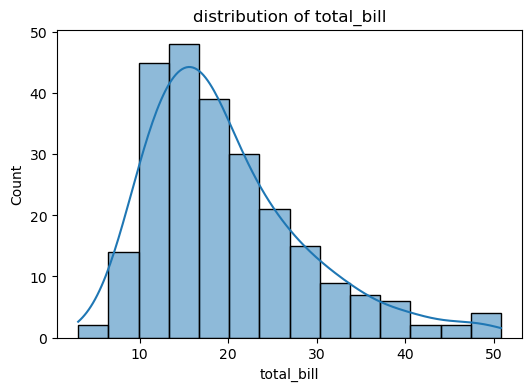

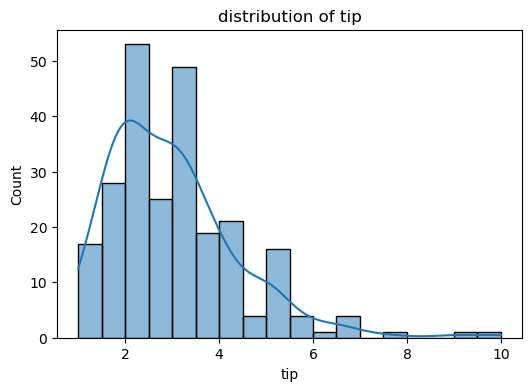

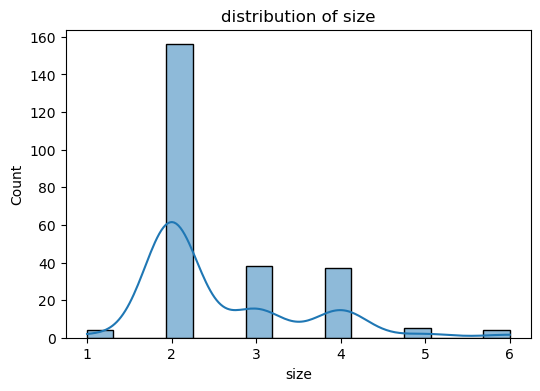

In [12]:
for c in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(tips[c],kde=1)
    plt.title(f"distribution of {c}")
    plt.show()

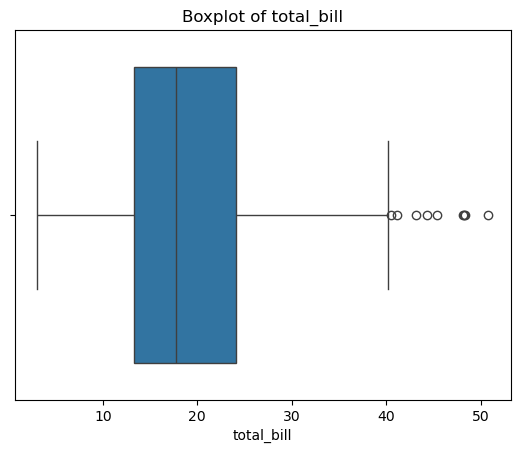

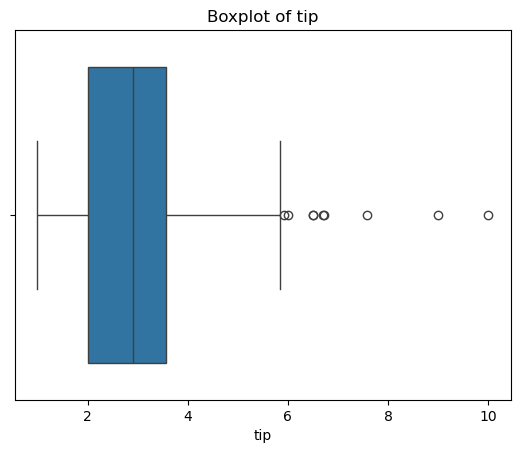

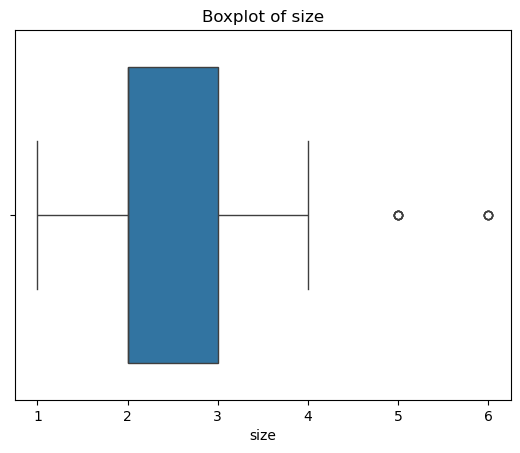

In [13]:
for c in num_cols:
    sns.boxplot(x=tips[c])
    plt.title(f"Boxplot of {c}")
    plt.show()

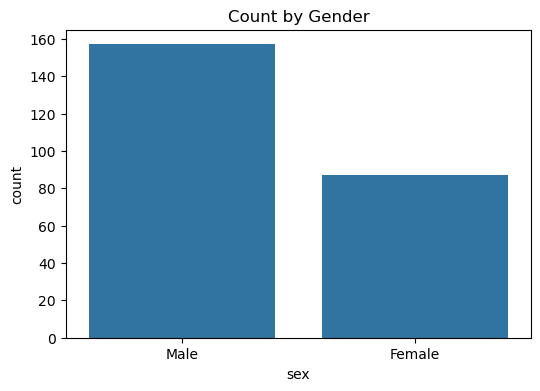

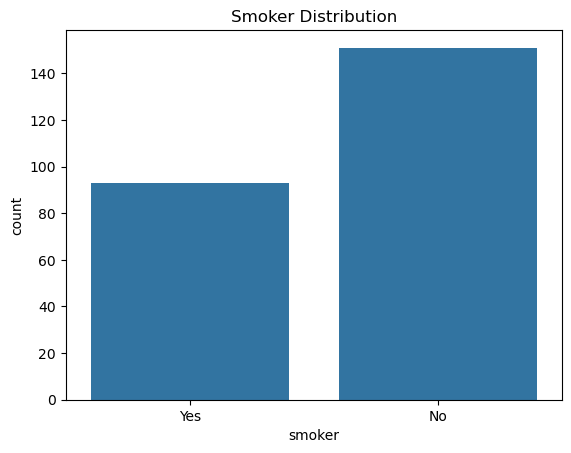

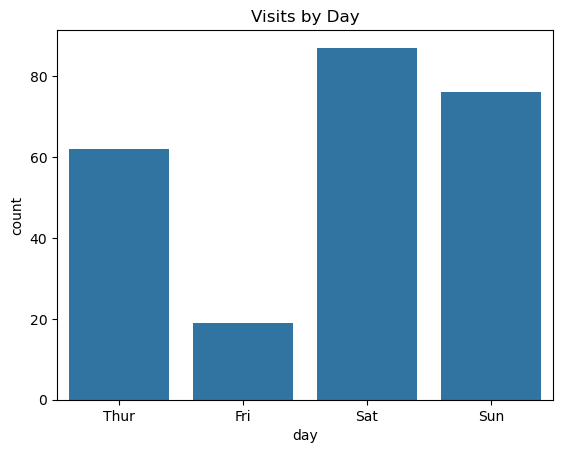

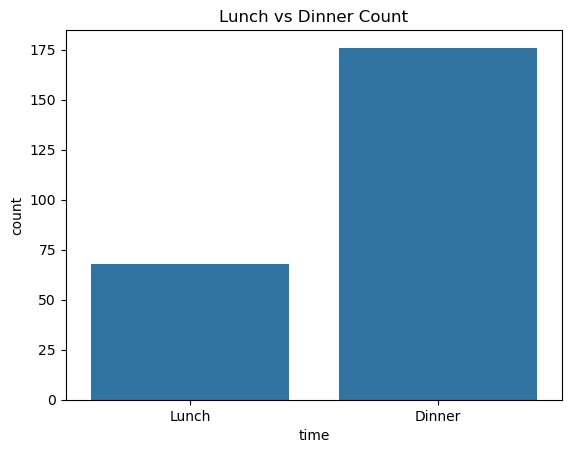

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x="sex", data=tips)
plt.title("Count by Gender")
plt.show()

sns.countplot(x="smoker", data=tips)
plt.title("Smoker Distribution")
plt.show()

sns.countplot(x="day", data=tips)
plt.title("Visits by Day")
plt.show()

sns.countplot(x="time", data=tips)
plt.title("Lunch vs Dinner Count")
plt.show()


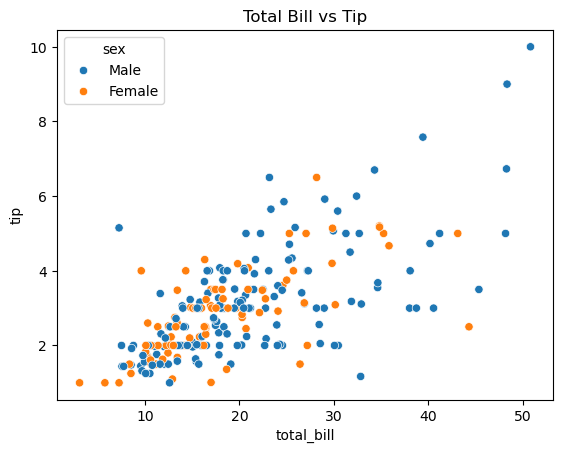

In [15]:
sns.scatterplot(data=tips,x="total_bill",y="tip",hue = "sex")
plt.title("Total Bill vs Tip")
plt.show()

In [16]:
tips["tip_percent"] = (tips["tip"] / tips["total_bill"]) * 100
tips.head()


,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [17]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size,tip_percent
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426
243,18.78,3.00,Female,No,Thur,Dinner,2,15.974441


In [18]:
tips.groupby('sex')['tip'].mean()

C:\Users\adity\AppData\Local\Temp\ipykernel_17936\2929813174.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('sex')['tip'].mean()


sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [19]:
tips.groupby("smoker")["tip"].mean()

C:\Users\adity\AppData\Local\Temp\ipykernel_17936\637511320.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("smoker")["tip"].mean()


smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64

In [20]:
tips.groupby("day")[["total_bill","tip"]].mean()

C:\Users\adity\AppData\Local\Temp\ipykernel_17936\3587948678.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("day")[["total_bill","tip"]].mean()


,total_bill,tip
day,,
Thur,17.682742,2.771452
Fri,17.151579,2.734737
Sat,20.441379,2.993103
Sun,21.410000,3.255132


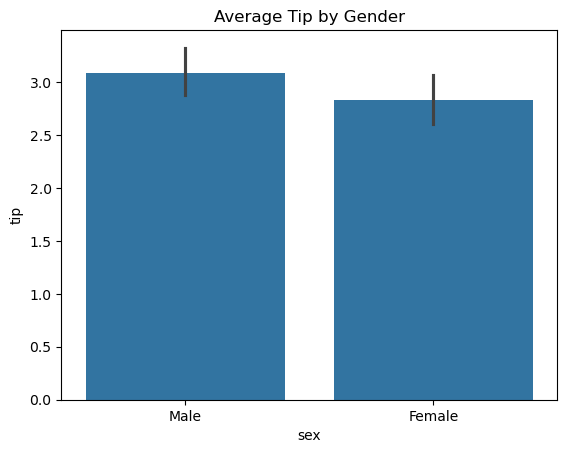

In [21]:
sns.barplot(data=tips,x="sex", y="tip",  estimator=np.mean)
plt.title("Average Tip by Gender")
plt.show()

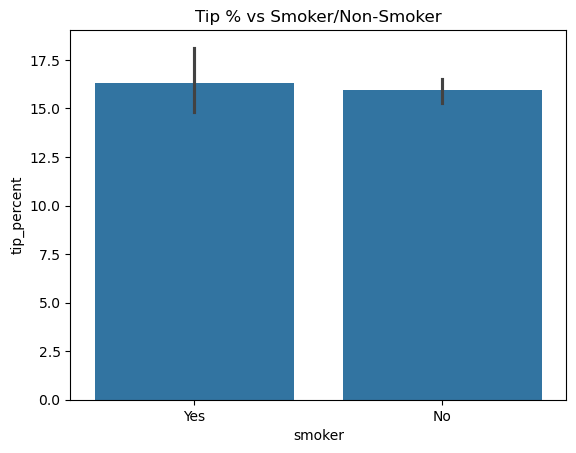

In [22]:
sns.barplot(data=tips,x='smoker',y='tip_percent',estimator = np.mean)
plt.title("Tip % vs Smoker/Non-Smoker")
plt.show()

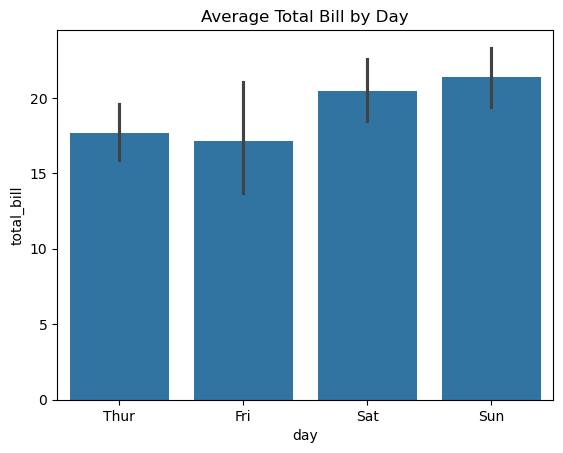

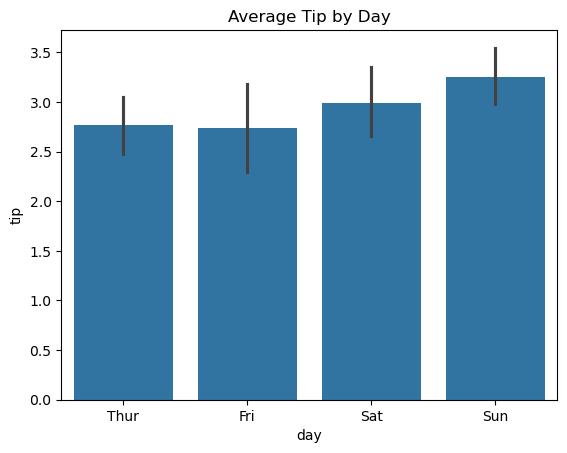

In [23]:
sns.barplot(x="day", y="total_bill", data=tips, estimator=np.mean)
plt.title("Average Total Bill by Day")
plt.show()

sns.barplot(x="day", y="tip", data=tips, estimator=np.mean)
plt.title("Average Tip by Day")
plt.show()

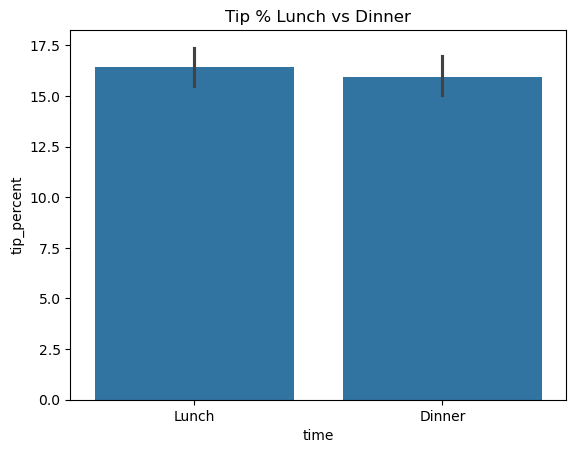

In [24]:
sns.barplot(x="time", y="tip_percent", data=tips)
plt.title("Tip % Lunch vs Dinner")
plt.show()

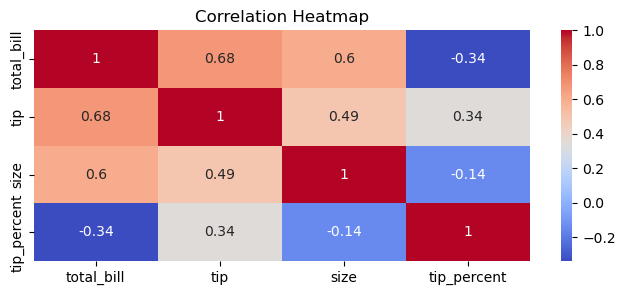

In [25]:
corr = tips.corr(numeric_only=True)
plt.figure(figsize=(8,3))
sns.heatmap(corr,annot=True,  cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()